# BEST FANTASY PREMIER LEAGUE OFFENSIVE PLAYERS OF 2017/18

## CLUSTERING FOOTBALL PLAYERS BY THEIR STATS



### There are 11 positions in a football team who play in various roles, the 4 main ones being:
Goalkeepers,
Defenders,
Midfielders,
Strikers.

This dataset including stats of each single player in 2017/18 Premier League season. Data reflects real players performance such as goals scored and assist as well as stats that comes from popular game - Fantasy Premier League.  
I am going to  cluster the best offensive players taking their performance and check if I can extract any insights. I decided to put players into 3 groups: very good, European class and World class.


In [800]:
import pandas as pd

In [801]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('ggplot')

In [802]:
import seaborn as sns

In [803]:
import numpy as np

In [804]:
#data - the name might be 
fpl = pd.read_csv('FPL_2017_18_Wk0.csv')

In [805]:
fpl_bestplayers = fpl[fpl['Points']>100]

fpl_players = fpl[fpl['Points']>50]
fpl_bestfwd = fpl_bestplayers[fpl_bestplayers['Position']=='FWD']
fpl_bestmid = fpl_bestplayers[fpl_bestplayers['Position']=='MID']
fpl_besties = fpl_bestfwd.append(fpl_bestmid)
fpl.head()

fpl_goodplayers = fpl[fpl['Points']>50]
fpl_goodfwd = fpl_goodplayers[fpl_goodplayers['Position']=='FWD']
fpl_goodmid = fpl_goodplayers[fpl_goodplayers['Position']=='MID']
fpl_goosties = fpl_goodfwd.append(fpl_goodmid)

fpl.head(10)

,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,Own_goals,Penalties_missed,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,0,0,0,0,6,0,0.3,2067,3,56
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,0,0,0,69,2,0,0.6,1710,5,72
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,0,0,0,0,2,0,12.6,1960,22,169
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,0,0,0,0,5,0,5.7,3352,8,102
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,0,0,0,0,5,1,1.1,2533,12,107
5,Alderweireld,TOT,DEF,60,67.8,249.2,50.0,36.8,13,0,...,0,0,0,0,3,0,3.6,1177,3,43
6,Alexander-Arnold,LIV,DEF,50,399.2,358.2,142.0,90.1,17,1,...,0,0,0,0,3,0,16.8,1573,10,83
7,Alisson,LIV,GKP,55,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,8.8,0,0,0
8,Alli,TOT,MID,90,878.5,775.2,934.0,258.8,28,9,...,0,0,0,0,7,0,3.6,2957,12,175
9,Alonso,CHE,DEF,65,549.6,697.8,822.0,207.1,30,7,...,0,0,0,0,6,0,16.9,2855,15,165


In [806]:
fpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              472 non-null    object 
 1   Team              472 non-null    object 
 2   Position          472 non-null    object 
 3   Cost              472 non-null    int64  
 4   Creativity        472 non-null    float64
 5   Influence         472 non-null    float64
 6   Threat            472 non-null    float64
 7   ICT               472 non-null    float64
 8   Goals_conceded    472 non-null    int64  
 9   Goals_scored      472 non-null    int64  
 10  Assists           472 non-null    int64  
 11  Own_goals         472 non-null    int64  
 12  Penalties_missed  472 non-null    int64  
 13  Penalties_saved   472 non-null    int64  
 14  Saves             472 non-null    int64  
 15  Yellow_cards      472 non-null    int64  
 16  Red_cards         472 non-null    int64  
 1

A dataset contains information about 472 players, among such columns as Name, Team, Goals_scored a few of them can be unclear.

Cost - Cost of the player in the Fantasy Premier League in 2017-18 season (in units of 0.1 million pounds)
Creativity - assesses player performance in terms of producing goalscoring opportunities for others
Influence - this evaluates the degree to which that player has made an impact on a single match or throughout the season.
Threat - A value that examines a player's threat on goal
ICT - Statistical Index combining the Influence, Creativity and Threat data
TSB - % of teams in which the player has been selected
Bonus - Bonus points received by the player due to their outstanding performance
Points - Points scored by the player during whole season

In [807]:
fpl_besties.describe()

,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,Assists,Own_goals,Penalties_missed,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,78.846154,719.534615,721.096154,876.365385,231.700000,31.692308,9.326923,7.250000,0.019231,0.230769,0.0,0.0,3.596154,0.096154,9.861538,2479.134615,14.634615,143.442308
std,19.818178,328.357231,218.636984,425.386193,71.912905,13.686316,6.220526,3.925158,0.138675,0.509340,0.0,0.0,2.530284,0.297678,10.306997,515.737090,6.964979,40.457876
min,50.000000,203.500000,385.400000,199.000000,131.300000,10.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.100000,1514.000000,3.000000,101.000000
25%,65.000000,507.050000,569.150000,551.000000,174.575000,21.500000,5.000000,5.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,2.800000,2051.000000,9.000000,112.000000
50%,75.000000,631.550000,694.100000,798.000000,221.000000,31.500000,8.000000,7.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000,6.500000,2468.000000,13.000000,130.000000
75%,95.000000,891.350000,833.850000,1132.500000,262.400000,39.000000,11.250000,9.000000,0.000000,0.000000,0.0,0.0,5.000000,0.000000,13.050000,2933.000000,19.000000,169.000000
max,130.000000,1744.200000,1496.200000,2355.000000,454.400000,63.000000,32.000000,18.000000,1.000000,2.000000,0.0,0.0,10.000000,1.000000,47.500000,3324.000000,31.000000,303.000000


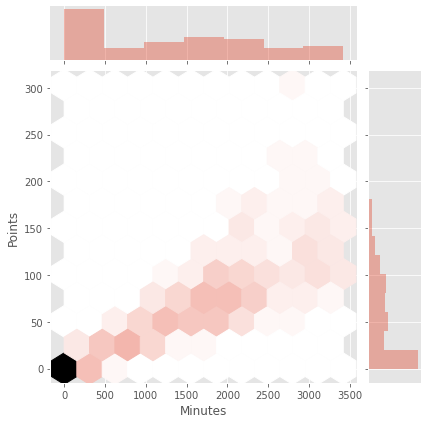

In [808]:
sns.jointplot(data=fpl, x='Minutes',y='Points', kind='hex',bins=50)

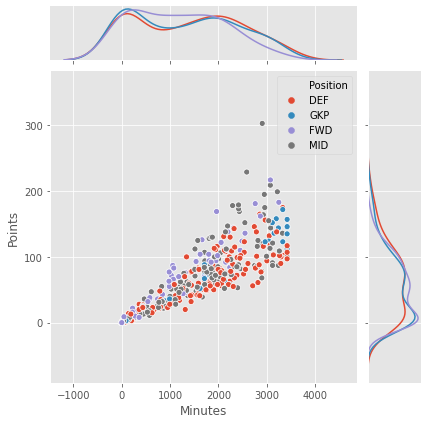

In [809]:
grid = sns.JointGrid(x='Minutes', y='Points', data=fpl)

g = grid.plot_joint(sns.scatterplot, hue='Position', data=fpl)
sns.kdeplot(fpl.loc[fpl['Position']=='DEF', 'Minutes'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(fpl.loc[fpl['Position']=='MID', 'Minutes'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(fpl.loc[fpl['Position']=='FWD', 'Minutes'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(fpl.loc[fpl['Position']=='FWD', 'Points'], ax=g.ax_marg_y,vertical=True, legend=False)
sns.kdeplot(fpl.loc[fpl['Position']=='MID', 'Points'], ax=g.ax_marg_y,vertical=True, legend=False)
sns.kdeplot(fpl.loc[fpl['Position']=='DEF', 'Points'], ax=g.ax_marg_y,vertical=True, legend=False)

Graphs above show that minutes are correlated with points and top players with the highest number of points are playing as Midfielders and Forwards.

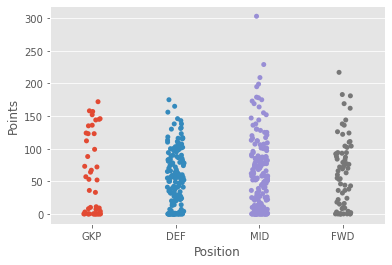

In [810]:
sns.stripplot(x="Position", y="Points", data=fpl,jitter=True, order=['GKP','DEF','MID','FWD'])

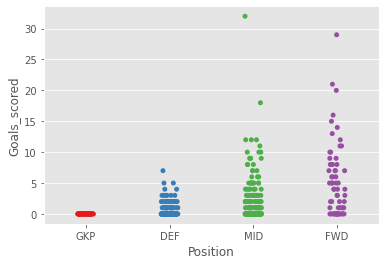

In [811]:
sns.stripplot(x="Position", y="Goals_scored", data=fpl,jitter=True,palette='Set1',order=['GKP','DEF','MID','FWD'])

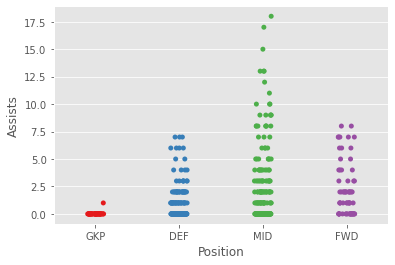

In [812]:
sns.stripplot(x="Position", y="Assists", data=fpl,jitter=True,palette='Set1',order=['GKP','DEF','MID','FWD'])

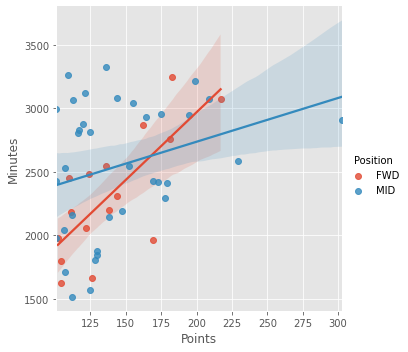

In [827]:
sns.lmplot(x="Points", y="Minutes", hue="Position",  data=fpl_besties);

Taking into consideration stripplots above I decided to take a close look at Forwards and Midfielders as they are the most contributed players into offensive part of the game. But firstly I only focused on strikers(forwards).

I narrow down a number of players by taking the best of them who got at least 100 points in season.

I created a new variable "gaa" which refers 2xGoals_scored + Assists. I guess that the variable will returned FWD contribution to their tasks on the pitch. 


In [813]:
df = pd.DataFrame(fpl_bestfwd[['Name','Points','Minutes','Goals_scored','Threat','Assists','Bonus','Cost']])
df.reset_index(drop=True, inplace=True)

#print(*df.ppc, sep=",")
gaa = df.Goals_scored*2+df.Assists
df = df.assign(gaa=gaa)
df

,Name,Points,Minutes,Goals_scored,Threat,Assists,Bonus,Cost,gaa
0,Aguero,169,1960,21,1484.0,6,22,110,48
1,Arnautovic,144,2309,11,1155.0,7,12,70,29
2,Firmino,181,2760,15,1341.0,8,29,95,38
3,Jesus,126,1660,13,1089.0,7,18,105,33
4,Kane,217,3074,29,2355.0,2,31,125,60
5,King,110,2450,8,902.0,4,10,65,20
6,Lacazette,138,2197,14,1291.0,5,11,95,33
7,Lukaku,162,2866,16,1334.0,7,18,110,39
8,Morata,122,2055,11,1192.0,6,13,90,28
9,Murray,111,2184,12,779.0,0,16,65,24


Firstly, I drew linear regression of two variables, x (sum of goals scored and assists) and y (number of points scored in season), then I clustered players taking into consideration these variables.

## FWD

### GAA and POINTS

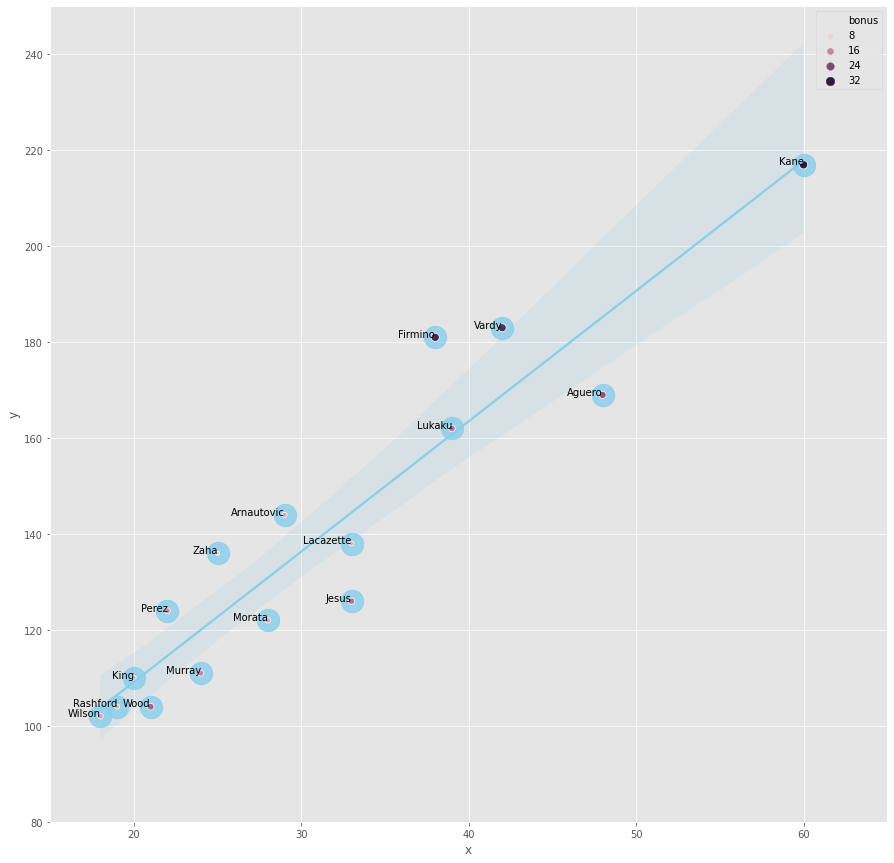

In [814]:
# Create dataframe
df = pd.DataFrame({
'x': [48,29,38,33,60,20,33,39,28,24,22,19,42,18,21,25],
'y': [169,144,181,126,217,110,138,162,122,111,124,104,183,102,104,136],
'bonus': [22,12,29,18,31,10,11,18,13,16,15,11,28,13,20,8],  
'group': ['Aguero','Arnautovic','Firmino','Jesus','Kane','King','Lacazette','Lukaku','Morata','Murray','Perez','Rashford','Vardy','Wilson','Wood','Zaha']
})

plt.figure(figsize=(15,15))
sns.regplot(data=df, x="x", y="y", fit_reg=True, marker="+", color="skyblue")

#sns.plt.show()

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':500})
p1.set(ylim=(80,250))
p1.set(xlim=(15,65))

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size='medium', color='black',weight='ultralight')
 
# see it
#sns.plt.show()
ax = sns.scatterplot(x="x", y="y",
                     hue="bonus", size="bonus",
                     data=df)


In [815]:
import sklearn
from sklearn.cluster import KMeans

x = [48,29,38,33,60,20,33,39,28,24,22,19,42,18,21,25]
y = [169,144,181,126,217,110,138,162,122,111,124,104,183,102,104,136]
group: ['Aguero','Arnautovic','Firmino','Jesus','Kane','King','Lacazette','Lukaku','Morata','Murray','Perez','Rashford','Vardy','Wilson','Wood','Zaha']


[[ 20.4        106.2       ]
 [ 45.4        182.4       ]
 [ 28.33333333 131.66666667]]
[1 2 1 2 1 0 2 1 2 0 2 0 1 0 0 2]
coordinate: [ 48 169] label: 1
coordinate: [ 29 144] label: 2
coordinate: [ 38 181] label: 1
coordinate: [ 33 126] label: 2
coordinate: [ 60 217] label: 1
coordinate: [ 20 110] label: 0
coordinate: [ 33 138] label: 2
coordinate: [ 39 162] label: 1
coordinate: [ 28 122] label: 2
coordinate: [ 24 111] label: 0
coordinate: [ 22 124] label: 2
coordinate: [ 19 104] label: 0
coordinate: [ 42 183] label: 1
coordinate: [ 18 102] label: 0
coordinate: [ 21 104] label: 0
coordinate: [ 25 136] label: 2


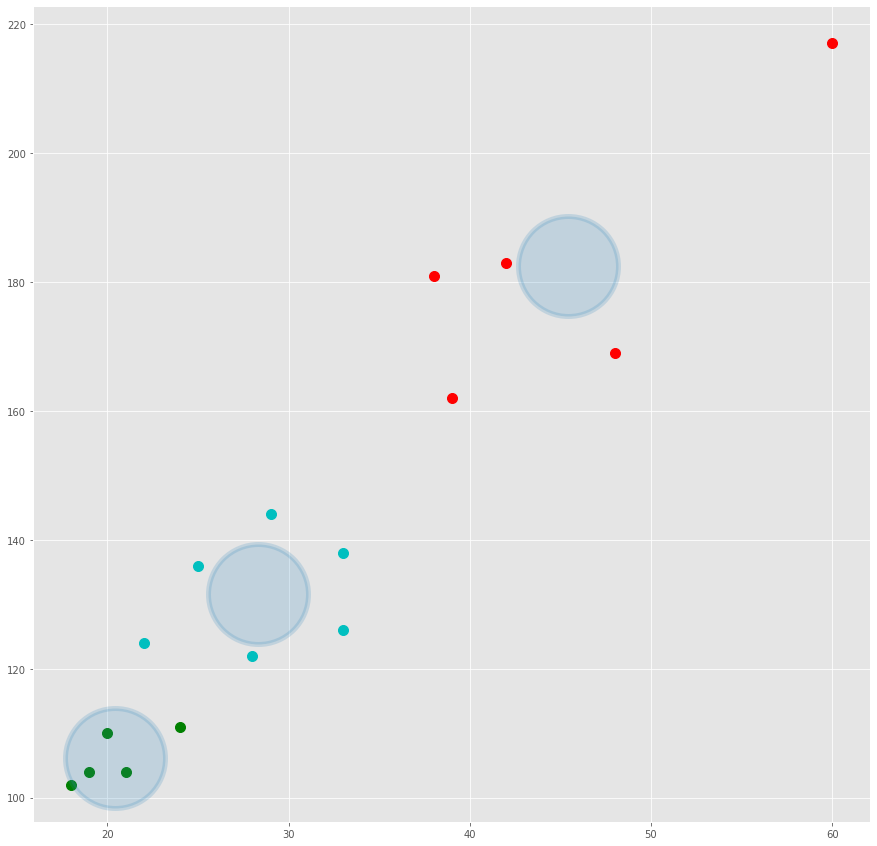

In [816]:
plt.figure(figsize=(15,15))
plt.scatter(x,y)

X = np.array(list(zip(x,y)))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_


print(centroids)
print(labels)

colors = ['g.','r.','c.']

for i in range(len(X)):
    print('coordinate:',X[i], 'label:', labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 20)
    #or line in range(0,df.shape[0]):
    p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s=10000,alpha=0.2, linewidths=5, zorder=10)


The first cluster "World class" includes: Kane, Aguero, Vardy, Lukaku, Firmino.
The second cluster "European class" includes: Arnautovic, Lacazette, Zaha, Jezus, Morata, Perez
The third cluster "Very good" includes": Murray, King, Wood, Rashford, Wilson

Then I decided to cluster players based on new created variables: "pointspm" - points per minute and "gapm" variable that refers to goals and assists per minute. This approach helps me get insights on the most effective forward players.

### GAPM and POINTSPM


In [817]:

df = pd.DataFrame(fpl_bestfwd[['Name','Points','Minutes','Goals_scored','ICT','Assists','Bonus']])


x = fpl_bestfwd.columns
df.reset_index(drop=True, inplace=True)
dfx=(df.Minutes/(df.Goals_scored+df.Assists))

df = df.assign(minpercontr=dfx)
gapm=round((dfx.mean()-dfx)+dfx.min(),1)
df = df.assign(gapm=gapm)
pointspm = round((df.Points/df.Minutes)*1000,2)

#print(*df.gapm, sep=",")


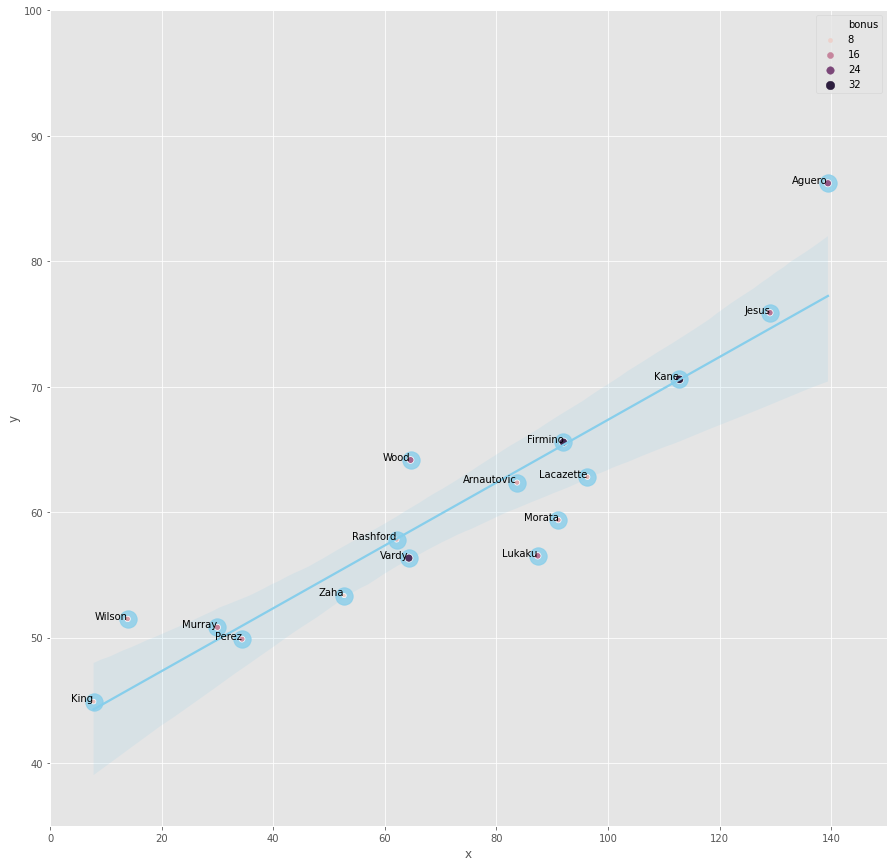

In [818]:
# Create dataframe
df = pd.DataFrame({
'x': [139.4,83.7,92.0,129.0,112.8,7.8,96.3,87.4,91.1,30.0,34.4,62.1,64.3,13.9,64.6,52.7],
'y': [86.22,62.36,65.58,75.9,70.59,44.9,62.81,56.52,59.37,50.82,49.88,57.81,56.34,51.49,64.16,53.35],
'bonus': [22,12,29,18,31,10,11,18,13,16,15,11,28,13,20,8],
'group': ['Aguero','Arnautovic','Firmino','Jesus','Kane','King','Lacazette','Lukaku','Morata','Murray','Perez','Rashford','Vardy','Wilson','Wood','Zaha']
})

plt.figure(figsize=(15,15))

#sns.plt.show()

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':300})
sns.regplot(data=df, x="x", y="y", fit_reg=True, marker="+", color="skyblue")
p1.set(ylim=(35,100))
p1.set(xlim=(0,150))

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size='medium', color='black', weight='ultralight')
 
# see it
#sns.plt.show()
ax = sns.scatterplot(x="x", y="y",
                     hue="bonus", size="bonus",
                     data=df)

[[ 77.13333333  59.81111111]
 [ 21.525       49.2725    ]
 [127.06666667  77.57      ]]
[2 0 0 2 2 1 0 0 0 1 1 0 0 1 0 0]
coordinate: [139.4   86.22] label: 2
coordinate: [83.7  62.36] label: 0
coordinate: [92.   65.58] label: 0
coordinate: [129.   75.9] label: 2
coordinate: [112.8   70.59] label: 2
coordinate: [ 7.8 44.9] label: 1
coordinate: [96.3  62.81] label: 0
coordinate: [87.4  56.52] label: 0
coordinate: [91.1  59.37] label: 0
coordinate: [30.   50.82] label: 1
coordinate: [34.4  49.88] label: 1
coordinate: [62.1  57.81] label: 0
coordinate: [64.3  56.34] label: 0
coordinate: [13.9  51.49] label: 1
coordinate: [64.6  64.16] label: 0
coordinate: [52.7  53.35] label: 0


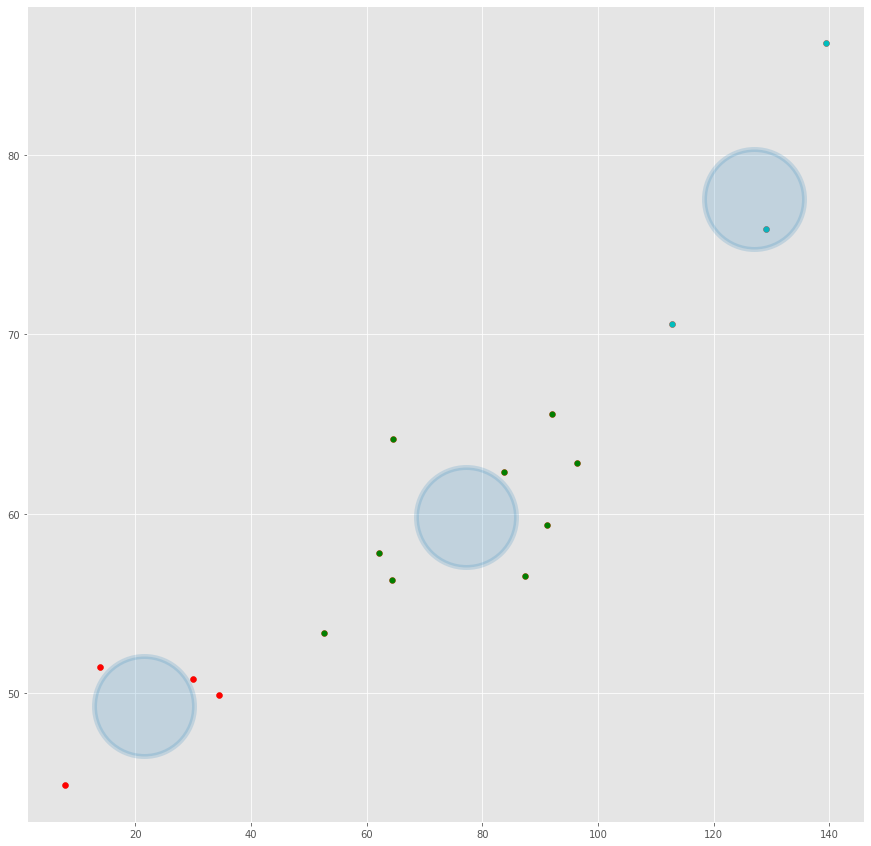

In [819]:
x= [139.4,83.7,92.0,129.0,112.8,7.8,96.3,87.4,91.1,30.0,34.4,62.1,64.3,13.9,64.6,52.7]
y= [86.22,62.36,65.58,75.9,70.59,44.9,62.81,56.52,59.37,50.82,49.88,57.81,56.34,51.49,64.16,53.35]

plt.figure(figsize=(15,15))
plt.scatter(x,y)

X = np.array(list(zip(x,y)))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ['g.','r.','c.','y.']

for i in range(len(X)):
    print('coordinate:',X[i], 'label:', labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s=10000,alpha=0.2, linewidths=5, zorder=10)

## MID and FWD
The first cluster "World class" in section of the most effective players changed a bit: Jesus was promoted whereas Vardy, Lukaku, Firmino were demoted, Aguero and Kane stays in World Class cluster. 

As we checked during data preparation some of the numbers from Midfielders were also outstanding. Even if some of the players are classified as Midfielders some of them are fulfilling more attacking role than a few players assigned as Forwards. I decided that statstics per minute will reflect the performance in the best way. I used once more new variables gapm, ICTpm and pointspm and narrowed down the number of players by selecting the group that got at least 140 points. I took to check the data in two approaches. 

first one:
### ICTpmrefers and poinstpm

second one: 
### ICTpmrefers and gapm



"ICTpm refers" to Influence, Creativity and Threat per minute
"pointspm" refers to points per minute
"gapm" refers to goals and assist per minute

It will get us response which offensive players are the most effective, versatile and crucial for their teams, who is the most influential, creative and at the same time is the threat as he scores and assists the most. 


### ICTpmrefers and poinstpm

In [820]:
df = pd.DataFrame(fpl_besties[['Name','Position','Points','Minutes','Goals_scored','ICT','Assists','Bonus']])
df = df[df['Points']>=145]

pointspm = round((df.Points/df.Minutes)*1000,2)
dfx=(fpl_besties.Minutes/(fpl_besties.Goals_scored+fpl_besties.Assists))
df = df.assign(pointspm=pointspm)
gapm=round((dfx.mean()-dfx)+dfx.min(),1)
df = df.assign(gapm=gapm)
ICTpm=round((df.ICT/(df.Minutes))*1000,2)
df = df.assign(ICTpm=ICTpm)

df.reset_index(drop=True, inplace=True)
df


,Name,Position,Points,Minutes,Goals_scored,ICT,Assists,Bonus,pointspm,gapm,ICTpm
0,Aguero,FWD,169,1960,21,302.5,6,22,86.22,180.1,154.34
1,Firmino,FWD,181,2760,15,312.7,8,29,65.58,132.7,113.30
2,Kane,FWD,217,3074,29,407.4,2,31,70.59,153.6,132.53
3,Lukaku,FWD,162,2866,16,273.2,7,18,56.52,128.1,95.32
4,Vardy,FWD,183,3248,20,248.6,2,28,56.34,105.1,76.54
5,Alli,MID,175,2957,9,258.8,13,12,59.18,118.3,87.52
6,David Silva,MID,169,2431,9,286.5,11,26,69.52,131.2,117.85
7,De Bruyne,MID,209,3073,8,368.9,18,25,68.01,134.5,120.05
8,Eriksen,MID,199,3218,11,358.2,10,23,61.84,99.5,111.31
9,Gross,MID,164,2928,7,257.6,8,24,56.01,57.5,87.98


In [821]:
print(*df.gapm, sep=",")

180.1,132.7,153.6,128.1,105.1,118.3,131.2,134.5,99.5,57.5,118.4,134.8,131.1,186.7,156.1,74.0,138.1,178.9,118.7


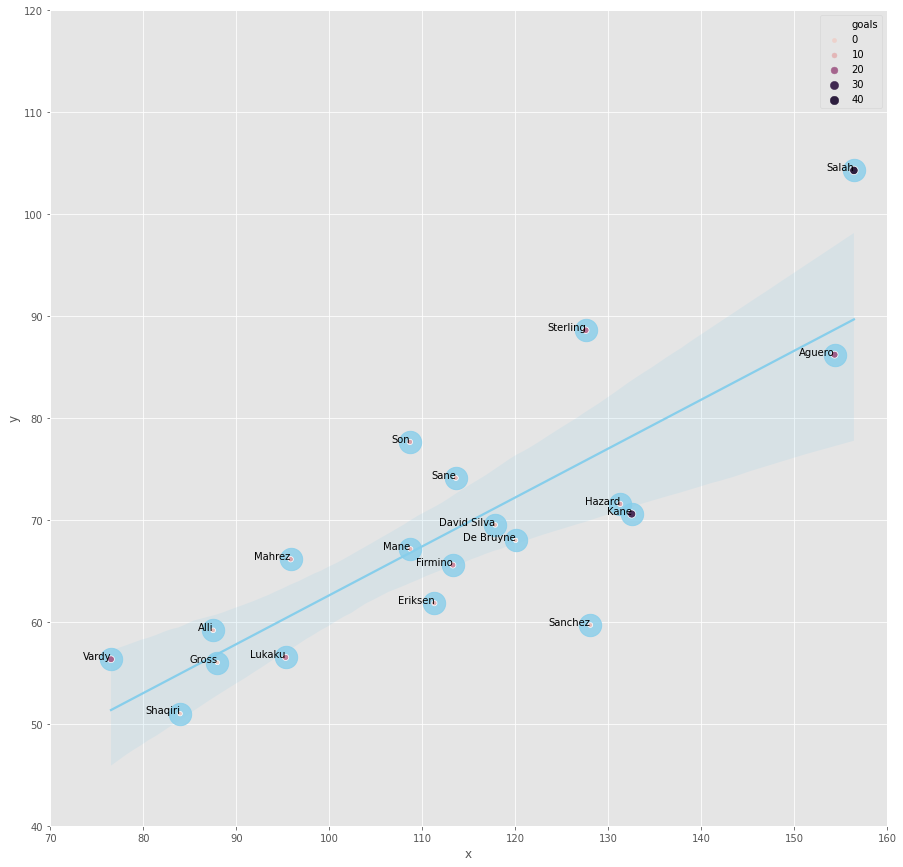

In [822]:

# Create dataframe
df = pd.DataFrame({
'x': [154.34,113.3,132.53,95.32,76.54,87.52,117.85,120.05,111.31,87.98,131.28,95.86,108.73,156.42,113.62,83.97,108.68,127.59,128.08],
'y': [86.22,65.58,70.59,56.52,56.34,59.18,69.52,68.01,61.84,56.01,71.58,66.15,67.15,104.3,74.12,51.0,77.66,88.62,59.7],
'goals': [21,15,29,16,20,9,9,8,11,7,12,12,10,32,10,8,12,18,9],
'group': ['Aguero','Firmino','Kane','Lukaku','Vardy','Alli','David Silva','De Bruyne','Eriksen','Gross','Hazard','Mahrez','Mane','Salah','Sane','Shaqiri','Son','Sterling','Sanchez']
})

plt.figure(figsize=(15,15))

#sns.plt.show()

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':500})
sns.regplot(data=df, x="x", y="y", fit_reg=True, marker="+", color="skyblue")
p1.set(xlim=(70,160))
p1.set(ylim=(40,120))

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size='medium', color='black', weight='ultralight')
 
# see it
#sns.plt.show()
ax = sns.scatterplot(x="x", y="y",
                     hue="goals", size="goals",
                     data=df)

[[ 87.865       57.53333333]
 [155.38        95.26      ]
 [119.36545455  70.39727273]]
[1 2 2 0 0 0 2 2 2 0 2 0 2 1 2 0 2 2 2]
coordinate: [154.34  86.22] label: 1
coordinate: [113.3   65.58] label: 2
coordinate: [132.53  70.59] label: 2
coordinate: [95.32 56.52] label: 0
coordinate: [76.54 56.34] label: 0
coordinate: [87.52 59.18] label: 0
coordinate: [117.85  69.52] label: 2
coordinate: [120.05  68.01] label: 2
coordinate: [111.31  61.84] label: 2
coordinate: [87.98 56.01] label: 0
coordinate: [131.28  71.58] label: 2
coordinate: [95.86 66.15] label: 0
coordinate: [108.73  67.15] label: 2
coordinate: [156.42 104.3 ] label: 1
coordinate: [113.62  74.12] label: 2
coordinate: [83.97 51.  ] label: 0
coordinate: [108.68  77.66] label: 2
coordinate: [127.59  88.62] label: 2
coordinate: [128.08  59.7 ] label: 2


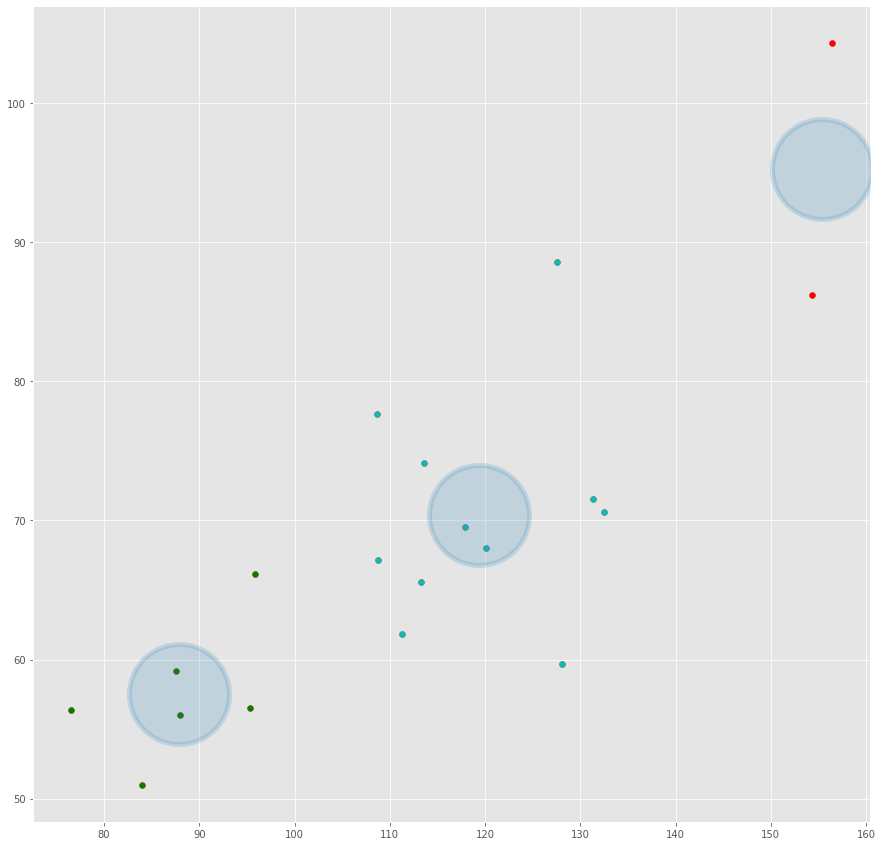

In [823]:
x= [154.34,113.3,132.53,95.32,76.54,87.52,117.85,120.05,111.31,87.98,131.28,95.86,108.73,156.42,113.62,83.97,108.68,127.59,128.08]
y= [86.22,65.58,70.59,56.52,56.34,59.18,69.52,68.01,61.84,56.01,71.58,66.15,67.15,104.3,74.12,51.0,77.66,88.62,59.7]

plt.figure(figsize=(15,15))
plt.scatter(x,y)

X = np.array(list(zip(x,y)))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ['g.','r.','c.','y.']

for i in range(len(X)):
    print('coordinate:',X[i], 'label:', labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s=10000,alpha=0.2, linewidths=5, zorder=10)

### ICTpmrefers and gapm



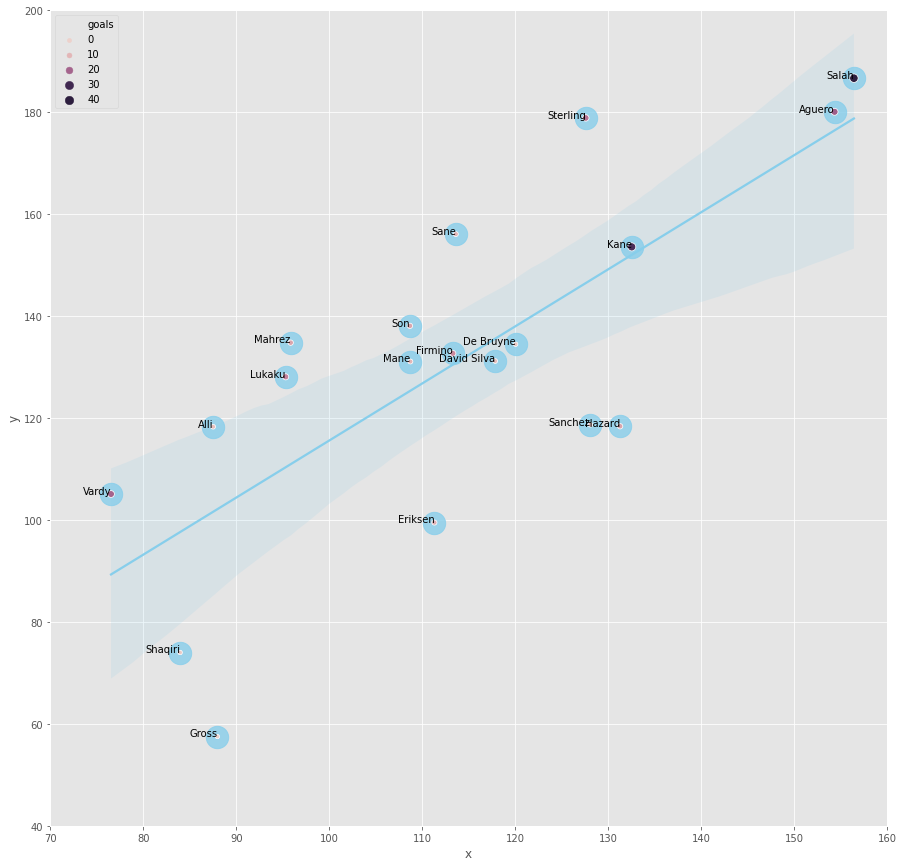

In [824]:
# Create dataframe
df = pd.DataFrame({
'x': [154.34,113.3,132.53,95.32,76.54,87.52,117.85,120.05,111.31,87.98,131.28,95.86,108.73,156.42,113.62,83.97,108.68,127.59,128.08],
'y': [180.1,132.7,153.6,128.1,105.1,118.3,131.2,134.5,99.5,57.5,118.4,134.8,131.1,186.7,156.1,74.0,138.1,178.9,118.7],
'goals': [21,15,29,16,20,9,9,8,11,7,12,12,10,32,10,8,12,18,9],
'group': ['Aguero','Firmino','Kane','Lukaku','Vardy','Alli','David Silva','De Bruyne','Eriksen','Gross','Hazard','Mahrez','Mane','Salah','Sane','Shaqiri','Son','Sterling','Sanchez']
})

plt.figure(figsize=(15,15))

#sns.plt.show()

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':500})
sns.regplot(data=df, x="x", y="y", fit_reg=True, marker="+", color="skyblue")
p1.set(xlim=(70,160))
p1.set(ylim=(40,200))

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.x[line], df.y[line], df.group[line], horizontalalignment='right', size='medium', color='black', weight='ultralight')
 
# see it
#sns.plt.show()
ax = sns.scatterplot(x="x", y="y",
                     hue="goals", size="goals",
                     data=df)

[[110.96666667 128.45833333]
 [ 82.83        78.86666667]
 [142.72       174.825     ]]
[2 0 2 0 1 0 0 0 0 1 0 0 0 2 0 1 0 2 0]
coordinate: [154.34 180.1 ] label: 2
coordinate: [113.3 132.7] label: 0
coordinate: [132.53 153.6 ] label: 2
coordinate: [ 95.32 128.1 ] label: 0
coordinate: [ 76.54 105.1 ] label: 1
coordinate: [ 87.52 118.3 ] label: 0
coordinate: [117.85 131.2 ] label: 0
coordinate: [120.05 134.5 ] label: 0
coordinate: [111.31  99.5 ] label: 0
coordinate: [87.98 57.5 ] label: 1
coordinate: [131.28 118.4 ] label: 0
coordinate: [ 95.86 134.8 ] label: 0
coordinate: [108.73 131.1 ] label: 0
coordinate: [156.42 186.7 ] label: 2
coordinate: [113.62 156.1 ] label: 0
coordinate: [83.97 74.  ] label: 1
coordinate: [108.68 138.1 ] label: 0
coordinate: [127.59 178.9 ] label: 2
coordinate: [128.08 118.7 ] label: 0


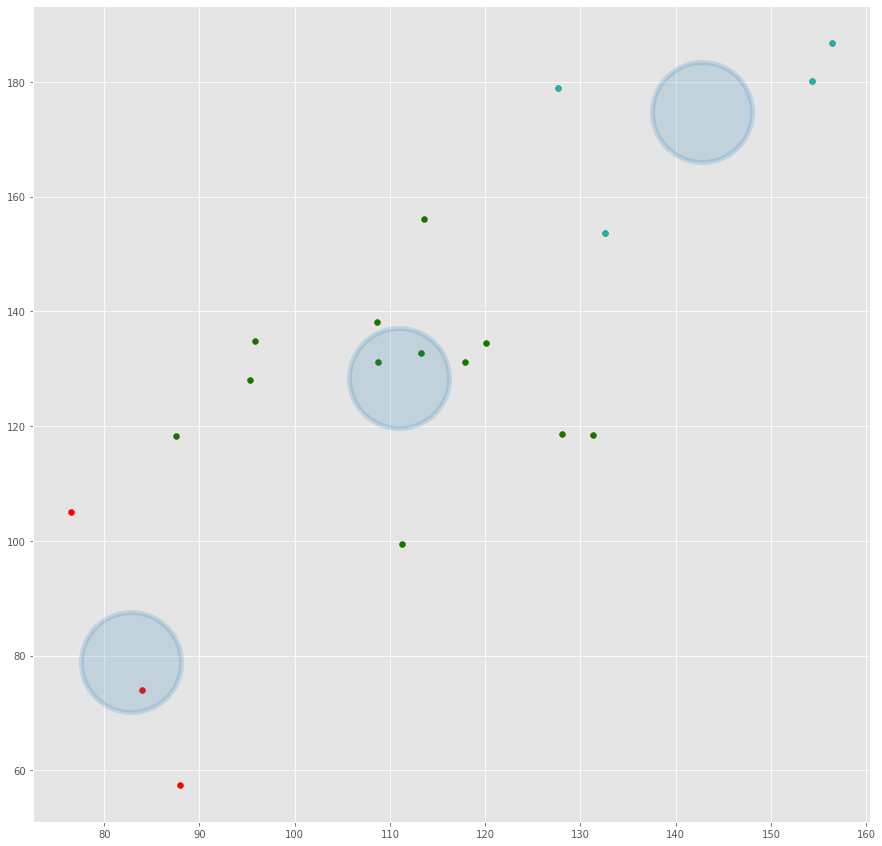

In [825]:
x= [154.34,113.3,132.53,95.32,76.54,87.52,117.85,120.05,111.31,87.98,131.28,95.86,108.73,156.42,113.62,83.97,108.68,127.59,128.08]
y= [180.1,132.7,153.6,128.1,105.1,118.3,131.2,134.5,99.5,57.5,118.4,134.8,131.1,186.7,156.1,74.0,138.1,178.9,118.7]

plt.figure(figsize=(15,15))
plt.scatter(x,y)

X = np.array(list(zip(x,y)))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ['g.','r.','c.','y.']

for i in range(len(X)):
    print('coordinate:',X[i], 'label:', labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s=10000,alpha=0.2, linewidths=5, zorder=10)



Both clusters with World Class players involve Salah and Aguero, second cluster extend the list to Sterling and Kane.

## THE END